In [1]:
### Pick the file directory
directory_list = ['/media/ab/data/Research_Data/EnhancerCon/']
#directory = '/media/ab/data/Research_Data/Enhancers/BedFiles/sorted/conScores/'

Directory:  /media/ab/data/Research_Data/EnhancerCon/
Number of files:  2


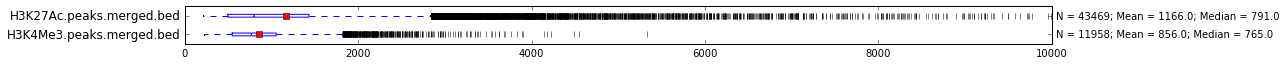

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [2]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick


def main():  
    
    for directory in directory_list:
        file_filter = '.bed'
        all_data = []
        data_labels = []
        dir_list = sorted(os.listdir(directory))
        #print dir_list
        for filename in dir_list:
            conScores = []
            if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
                conScores = load_from_file(directory+filename)
                all_data.append(conScores)
                data_labels.append(filename)
        make_graphs(all_data, data_labels, directory)

def load_from_file(file_to_open):              
    
    nonvalues = 0
    start_pos = 1
    end_pos = 2
    data_col = 3
    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        start = int(line.strip('\n').split('\t')[start_pos])   # Split the line
        end = int(line.strip('\n').split('\t')[end_pos])
        data.append(int(end - start))               # if valid, append to data
    #print "positions with no score" = ", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    return data                                       # return data from file

def make_graphs(all_data, data_labels, directory):
    
    num_files = len(data_labels)
    print "Directory: ", directory
    print "Number of files: ", num_files
    

    #avgs = []
    stats = []
    for i in all_data:
        #avgs.append(sum(i)/len(i))
        stats.append("N = "+str(len(i))+"; Mean = "+str( round(  (sum(i)/len(i)),3  )) +
                     "; Median = " + str(round(np.median(i), 3)))
    #print avgs
    #print ns
    
    ### Make the subplot for the boxplot
    fig, axs = plt.subplots(figsize=(18, (num_files*.5)))
    
    ### Make the boxplot
    bp = plt.boxplot(all_data, notch=True, sym='|', whis=1.5, vert=False, showmeans=True)
    
    ### Set the left axis parameters
    top = 10000
    bottom = 0
    axs.set_xlim(bottom, top)
    axs.set_ylim(0.5, num_files + 0.5)
    axs.invert_yaxis()
    
    ### Set the left axis labels
    ytickNames = plt.setp(axs, yticklabels=(q[:] for q in data_labels))
    plt.setp(ytickNames, rotation=0, fontsize=12)
    
    ### Make the right axis for the N labels
    ax2 = axs.twinx()
    
    ### Invert the right axis to match the left axis
    ax2.invert_yaxis()

    ### Find the tick positions of the left axis and use them to set positions for right axis
    ax2_tickpos = axs.get_yticks()
    ax2.set_yticks(ax2_tickpos)
    ax2.set_ybound(axs.get_ybound())
    ax2.set_yticklabels(stats)
    
    ### Show the boxplot
    plt.tight_layout()
    plt.show()
                        

if __name__ == "__main__":
    sys.exit(main())

78166


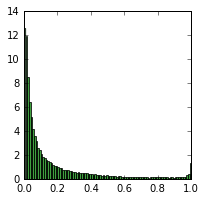

1445


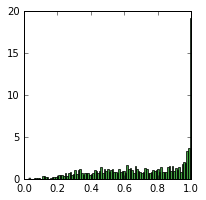

23480


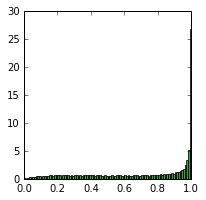

1731


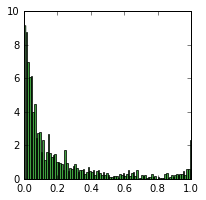

639


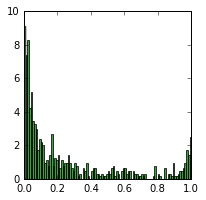

223


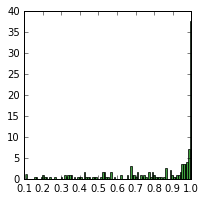

122


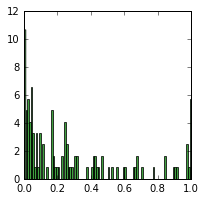

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
directory = ('/media/ab/data/Research_Data/Enhancers/ConservationScores/conScoresMax/')
file_filter = '.bedgraph'
dir_list = sorted(os.listdir(directory))
for filename in dir_list:
    if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
        j=open(directory+filename)
        Q = []
        for line in j:
            score = (line.strip('\n').split('\t')[3])
            if score != '.':
                Q.append(float(score))
        print len(Q)
        fig, axs = plt.subplots(figsize=(3,3))
        chart = plt.hist(Q, 100, normed=1, facecolor='green', alpha=0.75)
        plt.show()

Directory:  /media/ab/data/Research_Data/Enhancers/BedFiles/regionSizes/
Number of files:  7


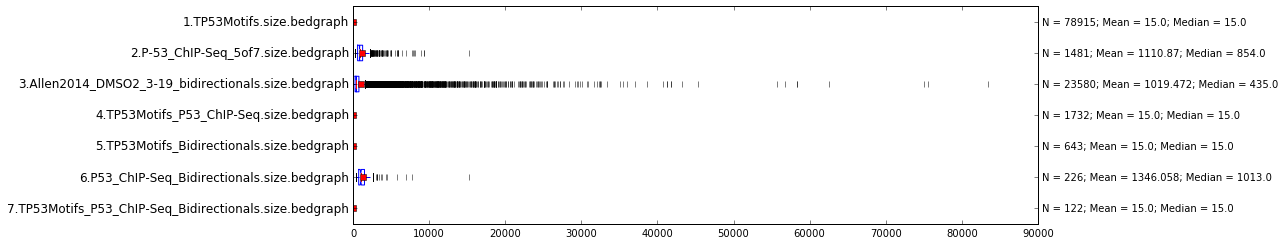

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [9]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick

directory_list = ['/media/ab/data/Research_Data/Enhancers/BedFiles/regionSizes/']

def main():  
    
    for directory in directory_list:
        file_filter = '.bedgraph'
        all_data = []
        data_labels = []
        dir_list = sorted(os.listdir(directory))
        #print dir_list
        for filename in dir_list:
            conScores = []
            if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
                conScores = load_from_file(directory+filename)
                all_data.append(conScores)
                data_labels.append(filename)
        make_graphs(all_data, data_labels, directory)

def load_from_file(file_to_open):              
    
    nonvalues = 0
    data_col = 3
    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        conScore = (line.strip('\n').split('\t')[data_col])   # Split the line
        if conScore != ".":                            # Check if data is valid
            data.append(float(conScore))               # if valid, append to data
        else:
            nonvalues += 1                             # if invalid, count invalid data points
    #print "positions with no score" = ", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    return data                                       # return data from file

def make_graphs(all_data, data_labels, directory):
    
    num_files = len(data_labels)
    print "Directory: ", directory
    print "Number of files: ", num_files
    

    #avgs = []
    stats = []
    for i in all_data:
        #avgs.append(sum(i)/len(i))
        stats.append("N = "+str(len(i))+"; Mean = "+str( round(  (sum(i)/len(i)),3  )) +
                     "; Median = " + str(round(np.median(i), 3)))
    #print avgs
    #print ns
    
    ### Make the subplot for the boxplot
    fig, axs = plt.subplots(figsize=(18, (num_files*.5)))
    
    ### Make the boxplot
    bp = plt.boxplot(all_data, notch=True, sym='|', whis=1.5, vert=False, showmeans=True)
    
    ### Set the left axis parameters
    top = 1
    bottom = 0
    #axs.set_xlim(bottom, top)
    axs.set_ylim(0.5, num_files + 0.5)
    axs.invert_yaxis()
    
    ### Set the left axis labels
    ytickNames = plt.setp(axs, yticklabels=(q[:] for q in data_labels))
    plt.setp(ytickNames, rotation=0, fontsize=12)
    
    ### Make the right axis for the N labels
    ax2 = axs.twinx()
    
    ### Invert the right axis to match the left axis
    ax2.invert_yaxis()

    ### Find the tick positions of the left axis and use them to set positions for right axis
    ax2_tickpos = axs.get_yticks()
    ax2.set_yticks(ax2_tickpos)
    ax2.set_ybound(axs.get_ybound())
    ax2.set_yticklabels(stats)
    
    ### Show the boxplot
    plt.tight_layout()
    plt.show()
                        

if __name__ == "__main__":
    sys.exit(main())

78915


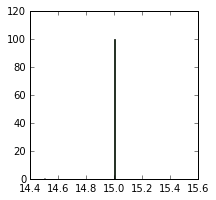

1481


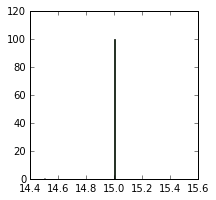

23580


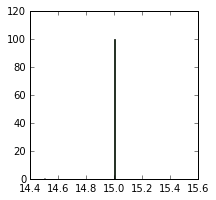

1732


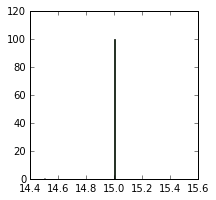

643


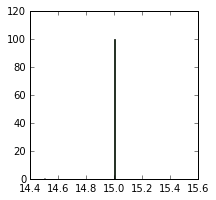

226


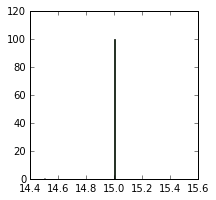

122


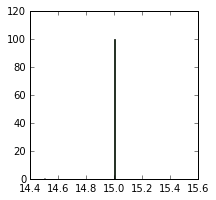

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
directory = ('/media/ab/data/Research_Data/Enhancers/ConservationScores/midRegion2/regionSizes/')
file_filter = '.bedgraph'
dir_list = sorted(os.listdir(directory))
for filename in dir_list:
    if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
        j=open(directory+filename)
        Q = []
        for line in j:
            score = (line.strip('\n').split('\t')[3])
            if score != '.':
                Q.append(float(score))
        print len(Q)
        fig, axs = plt.subplots(figsize=(3,3))
        chart = plt.hist(Q, 100, normed=1, facecolor='green', alpha=0.75)
        plt.show()

Directory:  /media/ab/data/Research_Data/Enhancers/ConservationScores/p53ChipSeq/
Number of files:  7


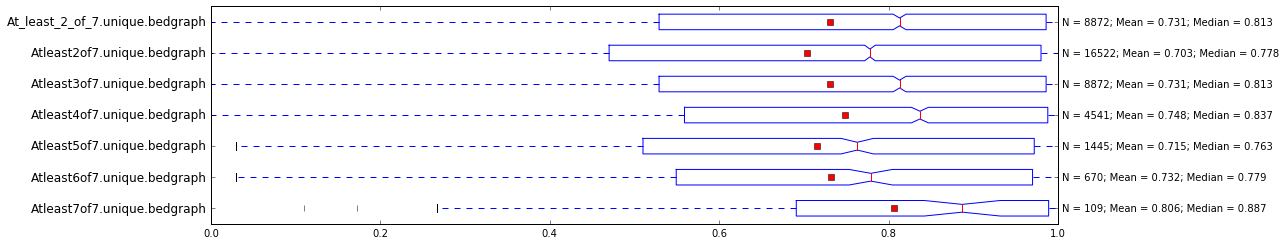

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [1]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick

directory_list = ['/media/ab/data/Research_Data/Enhancers/ConservationScores/p53ChipSeq/']

def main():  
    
    for directory in directory_list:
        file_filter = '.bedgraph'
        all_data = []
        data_labels = []
        dir_list = sorted(os.listdir(directory))
        #print dir_list
        for filename in dir_list:
            conScores = []
            if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
                conScores = load_from_file(directory+filename)
                all_data.append(conScores)
                data_labels.append(filename)
        make_graphs(all_data, data_labels, directory)

def load_from_file(file_to_open):              
    
    nonvalues = 0
    data_col = 3
    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        conScore = (line.strip('\n').split('\t')[data_col])   # Split the line
        if conScore != ".":                            # Check if data is valid
            data.append(float(conScore))               # if valid, append to data
        else:
            nonvalues += 1                             # if invalid, count invalid data points
    #print "positions with no score" = ", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    return data                                       # return data from file

def make_graphs(all_data, data_labels, directory):
    
    num_files = len(data_labels)
    print "Directory: ", directory
    print "Number of files: ", num_files
    

    #avgs = []
    stats = []
    for i in all_data:
        #avgs.append(sum(i)/len(i))
        stats.append("N = "+str(len(i))+"; Mean = "+str( round(  (sum(i)/len(i)),3  )) +
                     "; Median = " + str(round(np.median(i), 3)))
    #print avgs
    #print ns
    
    ### Make the subplot for the boxplot
    fig, axs = plt.subplots(figsize=(18, (num_files*.5)))
    
    ### Make the boxplot
    bp = plt.boxplot(all_data, notch=True, sym='|', whis=1.5, vert=False, showmeans=True)
    
    ### Set the left axis parameters
    top = 1
    bottom = 0
    #axs.set_xlim(bottom, top)
    axs.set_ylim(0.5, num_files + 0.5)
    axs.invert_yaxis()
    
    ### Set the left axis labels
    ytickNames = plt.setp(axs, yticklabels=(q[:] for q in data_labels))
    plt.setp(ytickNames, rotation=0, fontsize=12)
    
    ### Make the right axis for the N labels
    ax2 = axs.twinx()
    
    ### Invert the right axis to match the left axis
    ax2.invert_yaxis()

    ### Find the tick positions of the left axis and use them to set positions for right axis
    ax2_tickpos = axs.get_yticks()
    ax2.set_yticks(ax2_tickpos)
    ax2.set_ybound(axs.get_ybound())
    ax2.set_yticklabels(stats)
    
    ### Show the boxplot
    plt.tight_layout()
    plt.show()
                        

if __name__ == "__main__":
    sys.exit(main())

Directory:  /media/ab/data/Research_Data/Enhancers/ConservationScores/midRegion2/nogenes/
Number of files:  7


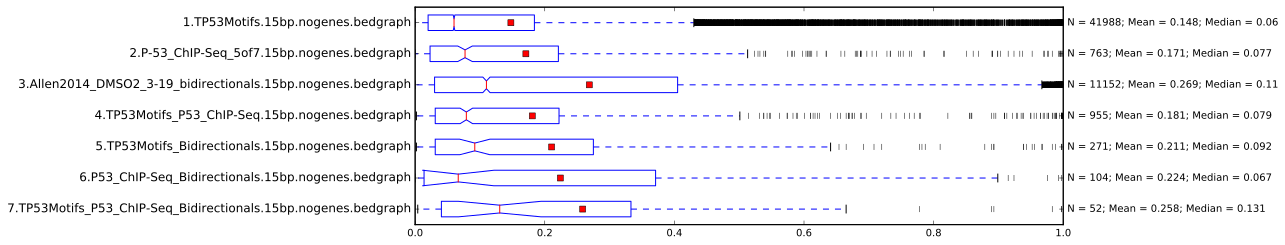

IOError: [Errno 2] No such file or directory: '~/test.svg'

In [11]:
### This cell imports the data from a text file that contains the distances between features and sorts them
### by chromosome. It creates a histogram for each chromosome that shows the distances between the features. 

%matplotlib inline
# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'svg',}


import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick

directory_list = ['/media/ab/data/Research_Data/Enhancers/ConservationScores/midRegion2/nogenes/']

def main():  
    
    for directory in directory_list:
        file_filter = '.bedgraph'
        all_data = []
        data_labels = []
        dir_list = sorted(os.listdir(directory))
        #print dir_list
        for filename in dir_list:
            conScores = []
            if filename[-(len(file_filter)):] == file_filter:      ### Load only the TSV files
                conScores = load_from_file(directory+filename)
                all_data.append(conScores)
                data_labels.append(filename)
        make_graphs(all_data, data_labels, directory)

def load_from_file(file_to_open):              
    
    nonvalues = 0
    data_col = 3
    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    for line in x:               ### For each line in the file 
        conScore = (line.strip('\n').split('\t')[data_col])   # Split the line
        if conScore != ".":                            # Check if data is valid
            data.append(float(conScore))               # if valid, append to data
        else:
            nonvalues += 1                             # if invalid, count invalid data points
    #print "positions with no score" = ", nonvalues                    # print invalid data points
    x.close()                                       # close open file 
    return data                                       # return data from file

def make_graphs(all_data, data_labels, directory):
    
    num_files = len(data_labels)
    print "Directory: ", directory
    print "Number of files: ", num_files
    

    #avgs = []
    stats = []
    for i in all_data:
        #avgs.append(sum(i)/len(i))
        stats.append("N = "+str(len(i))+"; Mean = "+str( round(  (sum(i)/len(i)),3  )) +
                     "; Median = " + str(round(np.median(i), 3)))
    #print avgs
    #print ns
    
    ### Make the subplot for the boxplot
    fig, axs = plt.subplots(figsize=(18, (num_files*.5)))
    
    ### Make the boxplot
    bp = plt.boxplot(all_data, notch=True, sym='|', whis=1.5, vert=False, showmeans=True)
    
    ### Set the left axis parameters
    top = 1
    bottom = 0
    #axs.set_xlim(bottom, top)
    axs.set_ylim(0.5, num_files + 0.5)
    axs.invert_yaxis()
    
    ### Set the left axis labels
    ytickNames = plt.setp(axs, yticklabels=(q[:] for q in data_labels))
    plt.setp(ytickNames, rotation=0, fontsize=12)
    
    ### Make the right axis for the N labels
    ax2 = axs.twinx()
    
    ### Invert the right axis to match the left axis
    ax2.invert_yaxis()

    ### Find the tick positions of the left axis and use them to set positions for right axis
    ax2_tickpos = axs.get_yticks()
    ax2.set_yticks(ax2_tickpos)
    ax2.set_ybound(axs.get_ybound())
    ax2.set_yticklabels(stats)
    
    ### Show the boxplot
    plt.tight_layout()
    plt.show()
    plt.savefig("~/test.svg")
                        

if __name__ == "__main__":
    sys.exit(main())